In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

In [2]:
data = pd.read_csv("~/results/monthly_returns.csv", parse_dates=True, header=None, names=['Date','Profit'], index_col='Date')
data.head()

,Profit
Date,
1974-12-31,NaN
1975-01-31,77.735721
1975-02-28,-2057.395572
1975-03-31,-1764.406115
1975-04-30,18663.122146


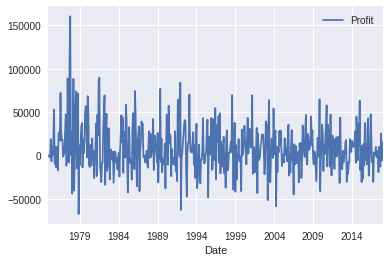

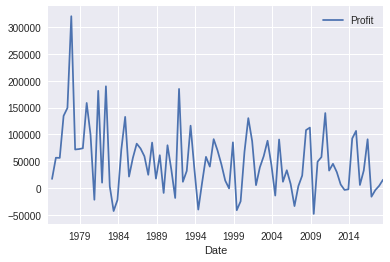

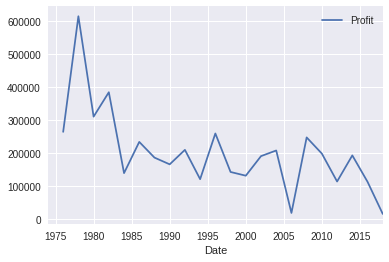

In [3]:
data.plot()
data.resample('6M').sum().plot();
data.resample('2A').sum().plot();

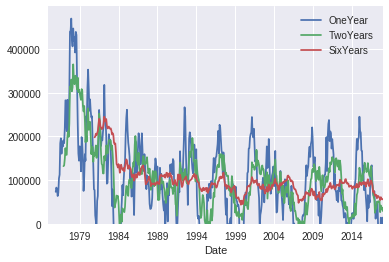

In [4]:
import datetime
#first_date = datetime.datetime(1990,1,1)
data['MonthValue'] = data.index.month
data['Month']  = data.index.strftime("%B")
data['OneYear'] = data['Profit'].resample('M').sum().rolling(12).sum()
data['TwoYears'] = data['Profit'].resample('M').sum().rolling(24).sum()/2
data['FourYears'] = data['Profit'].resample('M').sum().rolling(48).sum()/4
data['SixYears'] = data['Profit'].resample('M').sum().rolling(72).sum()/6

ax = data[['OneYear','TwoYears','SixYears']].plot();
ax.set_ylim(0, None);

#last_date = datetime.datetime(2010,1,1)
#ax.set_ylim(first_date, last_date);


In [5]:
data.tail()

,Profit,MonthValue,Month,OneYear,TwoYears,FourYears,SixYears
Date,,,,,,,
2017-09-30,-12996.581239,9,September,-41505.426209,26680.059771,83264.839908,54199.754825
2017-10-31,25140.391303,10,October,14128.926802,41783.226220,84818.531674,60984.944721
2017-11-30,-6027.582050,11,November,4543.384600,34304.640135,79912.819143,57288.118609
2017-12-31,-4384.799377,12,December,-75.866639,37220.315549,77805.397568,56825.127930
2018-01-31,15292.821162,1,January,14142.701236,29400.727240,77405.697668,55906.312695


In [6]:
pivoted = data.pivot_table('Profit', index=data.index.year, columns='Month')

In [7]:
pv = pivoted[['January','February','March','April','May','June','July','August','September','October','November','December']]
pd.options.display.float_format = '{:,.1f}'.format
pv

Month,January,February,March,April,May,June,July,August,September,October,November,December
1974,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1975,77.7,"-2,057.4","-1,764.4","18,663.1","-6,608.6","8,535.4",81.7,"16,955.2","52,699.5","-9,736.1","9,990.5","-13,601.2"
1976,"9,788.1","-6,091.2","-17,073.5","25,681.6","26,748.1","17,077.3","72,080.9","28,220.7","17,460.6","18,266.2","-1,425.8",-70.3
1977,"3,732.2","27,585.9","47,400.1","-11,951.8","-6,349.5","88,910.0","26,941.8","-8,051.5","112,705.3","160,634.6",235.8,"27,996.2"
1978,"-43,973.5","11,649.8","88,358.7","-40,765.5","2,595.9","53,911.3","74,052.4","-15,110.3","-2,031.3","71,770.5","-67,518.1","11,415.6"
1979,"-11,042.5","9,898.8","33,004.1","37,443.6","-13,813.8","18,562.8","2,703.9","16,853.8","49,974.5","56,969.9","34,446.9","-2,304.4"
1980,"68,404.4","50,658.8","-10,138.4","-13,316.1","12,079.7","-8,439.5","-11,650.8","19,562.8","-4,807.2","4,995.9","-26,112.9","-3,983.8"
1981,"10,582.7","37,085.6","-23,855.4","47,114.0","23,393.1","86,837.9","89,801.8","-12,669.8","-19,360.3","-30,740.1","-8,503.3","-8,626.4"
1982,"30,799.5","50,609.4","69,294.2","-33,747.4","24,548.0","48,188.7","-17,926.3","-10,674.4","31,489.3","29,501.5","-27,708.8","-1,551.7"
1983,"6,947.5","-3,682.2","-4,879.2","4,274.0","-31,667.6","-14,097.0","4,483.0","3,002.9","-8,102.2","-2,555.0","-16,324.5","-2,813.1"


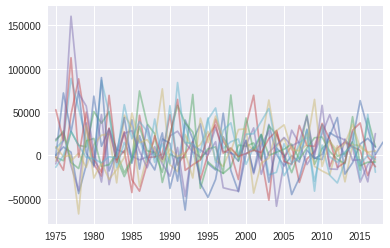

In [8]:
pv.plot(legend=False, alpha=0.5)

In [9]:
data.tail()


,Profit,MonthValue,Month,OneYear,TwoYears,FourYears,SixYears
Date,,,,,,,
2017-09-30,"-12,996.6",9,September,"-41,505.4","26,680.1","83,264.8","54,199.8"
2017-10-31,"25,140.4",10,October,"14,128.9","41,783.2","84,818.5","60,984.9"
2017-11-30,"-6,027.6",11,November,"4,543.4","34,304.6","79,912.8","57,288.1"
2017-12-31,"-4,384.8",12,December,-75.9,"37,220.3","77,805.4","56,825.1"
2018-01-31,"15,292.8",1,January,"14,142.7","29,400.7","77,405.7","55,906.3"
